In [108]:
#references
# https://pixspy.com/
# https://blog.csdn.net/xufive/article/details/112308533
# https://tw511.com/a/01/36832.html
# https://auzhu.com/sports/1025003.html

In [109]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

In [110]:
def reduce_highlights(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 先轉成灰階處理
    ret, thresh = cv2.threshold(img_gray, 200, 255, 0)  # 利用 threshold 過濾出高光的部分，目前設定高於 200 即為高光
    contours, hierarchy  = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_zero = np.zeros(img.shape, dtype=np.uint8) 
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour) 
        img_zero[y:y+h, x:x+w] = 0 
        mask = img_zero     
    
    # alpha，beta 共同決定高光消除後的模糊程度
    # alpha: 亮度的缩放因子，默認是 0.2， 範圍[0, 2], 值越大，亮度越低
    # beta:  亮度缩放後加上的参数，默認是 0.4， 範圍[0, 2]，值越大，亮度越低
    result = cv2.illuminationChange(img, mask, alpha=0.2, beta=0.4) 
        
    return result

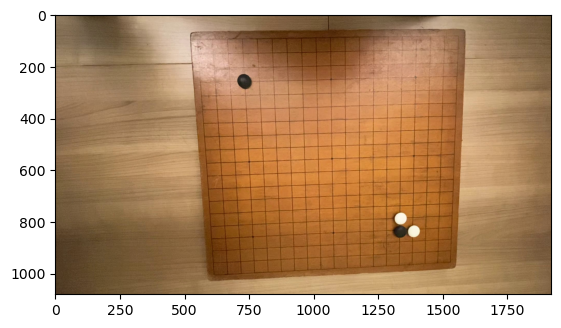

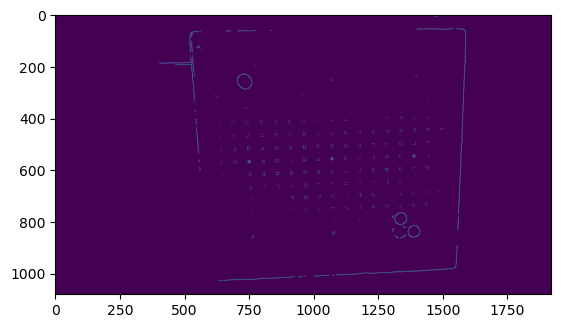

In [111]:
#320 (hand-block)

img = cv2.imread('./data/frame550.jpg')
orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = reduce_highlights(orig_img)

gray = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (9,9), 3)
gray = cv2.Canny(gray, 70, 70)

plt.imshow(img)
plt.show()

plt.imshow(gray)
plt.show()

(1, 6, 3)
(6, 3)
840 838
898 904
200 214
838 898
30 26
206 554
白棋：2 |  黑棋：2

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


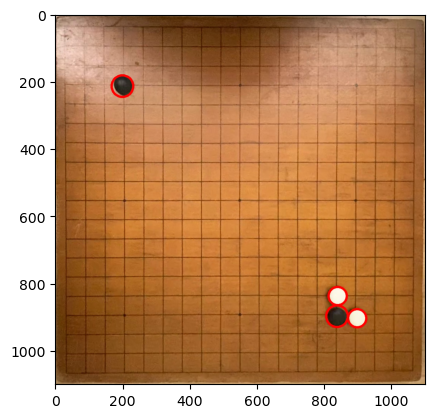

In [112]:
img_w_h = 1100
pts1 = np.float32([(520,64),(587,1034),(1592,52),(1561,987)])
pts2 = np.float32([(0,0), (0,img_w_h), (img_w_h,10), (img_w_h,img_w_h)])

m = cv2.getPerspectiveTransform(pts1, pts2) 
fixed_rgb_img = cv2.warpPerspective(img, m, (img_w_h, img_w_h))
fixed_gray_img = cv2.warpPerspective(gray, m, (img_w_h, img_w_h))

circle1 = cv2.HoughCircles(fixed_gray_img, cv2.HOUGH_GRADIENT, 1, 20, param1=100, param2=13, minRadius=5, maxRadius=35)
print(circle1.shape)
circles = circle1[0, :, :]
circles = np.uint16(np.around(circles))

pure_circles = []
print(circles.shape)
# pruning strange circles by checking RGB values
for idx, i in enumerate(circles):
    print(i[0], i[1])
    # r = (fixed_rgb_img[i[1], i[0], 0] + fixed_rgb_img[i[1]+3, i[0]+3, 0] + fixed_rgb_img[i[1]+5, i[0]+5, 0] + fixed_rgb_img[i[1]-3, i[0]-3, 0] + fixed_rgb_img[i[1]-5, i[0]-5, 0])/5
    # g = (fixed_rgb_img[i[1], i[0], 1] + fixed_rgb_img[i[1]+3, i[0]+3, 1] + fixed_rgb_img[i[1]+5, i[0]+5, 1] + fixed_rgb_img[i[1]-3, i[0]-3, 1] + fixed_rgb_img[i[1]-5, i[0]-5, 1])/5
    # b = (fixed_rgb_img[i[1], i[0], 2] + fixed_rgb_img[i[1]+3, i[0]+3, 2] + fixed_rgb_img[i[1]+5, i[0]+5, 2] + fixed_rgb_img[i[1]-3, i[0]-3, 2] + fixed_rgb_img[i[1]-5, i[0]-5, 2])/5
    r, g, b = fixed_rgb_img[i[1], i[0], :]
    if r < 80 and g < 80 and b < 80:
        pure_circles.append((i[0],i[1],i[2]))
    elif r > 210 and g > 210 and b > 210:
    	pure_circles.append((i[0],i[1],i[2]))

pure_circles = np.array(pure_circles)
for i in pure_circles:
    cv2.circle(fixed_rgb_img, (i[0], i[1]), i[2], (255,0,0), 5)
plt.imshow(fixed_rgb_img)
temp_output = cv2.cvtColor(fixed_rgb_img, cv2.COLOR_BGR2RGB)
cv2.imwrite('output1.jpg', temp_output)


mesh = np.linspace(0, img_w_h, 19, dtype=int)
rows, cols = np.meshgrid(mesh, mesh)
phase = np.zeros_like(rows, dtype=np.uint8)
im_hsv = cv2.cvtColor(fixed_rgb_img, cv2.COLOR_RGB2HSV_FULL)


white_count, black_count = 0, 0
for circle in pure_circles:    
	row = int(round((circle[1]-10)/58))
	col = int(round((circle[0]-10)/58))

	# size = 3
	# hsv_ = im_hsv[cols[row,col]-size:cols[row,col]+size, rows[row,col]-size:rows[row,col]+size]
	# s = np.mean(hsv_[:,:,1])
	# v = np.mean(hsv_[:,:,2])
 
	# get RGB values
	r, g, b = fixed_rgb_img[circle[1], circle[0], :]

	if r < 100 and g < 100 and b < 100:
		phase[row, col] = 1  #黑棋
		black_count += 1
	elif r > 200 and g > 200 and b > 200:
		phase[row, col] = 2  #白棋
		white_count += 1

# print go board prediction
print("白棋：{} |  黑棋：{}\n".format(white_count, black_count))
print(phase)